# Distribution of a sum of miltiple random variables with same distribution

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import  matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [60]:
source_mu = 1.0
source_std = 2.0
sample_size = 100000
print(f'Distribution of input variables in N(mu={source_mu}, std={source_std})')

Distribution of input variables in N(mu=1.0, std=2.0)


In [61]:
def get_random_normal_sample(mu, std, size):
    return np.random.normal(mu, std, size = size)

In [62]:
data = pd.DataFrame({'a':get_random_normal_sample(source_mu, source_std, sample_size),
                    'b':get_random_normal_sample(source_mu, source_std, sample_size),
                    'c':get_random_normal_sample(source_mu, source_std, sample_size)})
data.describe()

,a,b,c
count,100000.000000,100000.000000,100000.000000
mean,0.983327,1.000752,1.002234
std,2.003054,2.003126,1.998659
min,-7.481044,-8.047781,-7.521372
25%,-0.376823,-0.350403,-0.346613
50%,0.986533,1.005666,1.002037
75%,2.345701,2.345072,2.361477
max,9.922039,9.718275,10.005259


In [63]:
data.head()

,a,b,c
0,-0.630343,0.266962,-2.733478
1,2.772858,3.022727,2.024432
2,-1.252920,5.091925,2.054776
3,-1.288893,2.539933,3.805420
4,2.404254,6.598149,-0.843668


In [102]:
# define a new random variable - a sum of three input random variables
sum = data.T.sum()
sum.describe()

count    100000.000000
mean          2.986313
std           3.471663
min         -11.940658
25%           0.653154
50%           2.993369
75%           5.331826
max          18.117519
dtype: float64

In [120]:
print(f"Mean of the sum of three random variables is: {(sum.mean()/data['a'].mean()):.2f} times higher than mean of distributions underlying varibales")

Mean of the sum of three random variables is: 3.04 times higher than mean of distributions underlying varibales


In [118]:
print(f"Variance of the sum of three random variables is: {(sum.var()/data['a'].var()):.2f} times higher than variance of distributions of underlying variables")

Variance of the sum of three random variables is: 3.00 times higher than variance of distributions of underlying variables


Text(0.5, 1.0, 'Distribution of a sum of three identiacally distributed random variables')

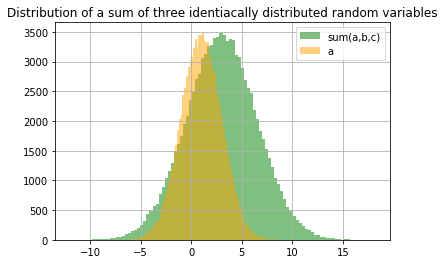

In [124]:
ax = sum.hist(bins=100, color = 'green', alpha=0.5, label='sum(a,b,c)')
data['a'].hist(bins=100, color = 'orange', alpha=0.5, label='a')
plt.legend()
plt.title('Distribution of a sum of three identiacally distributed random variables')